# Problem Statement
**Phishing is a form of fraud in which the attacker tries to steal sensitive information such as login credentials or account information by sending as a reputable entity or person in email or other communication channels.** Typically a victim receives a message that appears to have been sent by a known contact or organization. The message contains malicious software targeting the user’s computer or has links to direct victims to malicious websites in order to trick them into divulging personal and financial information, such as passwords, account IDs or credit card details.

In this project we will see what all features can we derive and use from the domain/URL of a website to detect whether it is phishing or not. First of all let us understand the breakdown of a URL.

##Domain Analysis
**URL components**

Uniform Resource Locator (URL) is created to address web pages. The figure below shows relevant parts in the structure of a typical URL.
<img src='https://miro.medium.com/max/1400/1*mPoNQ5LUkuOTog1dUb1EFw.png' width=600></img>

There are 4 types of features that we can extract from the URL.
- Address Bar based Features
- Abnormal Based Features
- HTML and JavaScript based Features
- Domain based Features

### Address Bar based Features
1. **Having the IP Address**<br>
If an IP address is used as an alternative of the domain name in the URL, such as “http://125.98.3.123/fake.html”, users can be sure that someone is trying to steal their personal information. Sometimes, the IP address is even transformed into hexadecimal code as shown in the following link “http://0x58.0xCC.0xCA.0x62/2/paypal.ca/index.html”.
> RULE: IF <br>
{If The Domain Part has an IP Address → Phishing<br>
{Otherwise→ Legitimate

2. **Long URL to Hide the Suspicious Part**<br>
Phishers can use long URL to hide the doubtful part in the address bar. For example: 
http://federmacedoadv.com.br/3f/aze/ab51e2e319e51502f416dbe46b773a5e/?cmd=_home&amp;dispatch=11004d58f5b74f8dc1e7c2e8dd4105e811004d58f5b74f8dc1e7c2e8dd4105e8@phishing.website.html
To ensure accuracy of our study, we calculated the length of URLs in the dataset and produced an average URL length. The results showed that if the length of the URL is greater than or equal 54 characters then the URL classified as phishing. By reviewing our dataset we were able to find 1220 URLs lengths equals to 54 or more which constitute 48.8% of the total dataset size. We have been able to update this feature rule by using a method based on frequency and thus improving upon its accuracy.
> RULE: IF<br>
{URL length<54 → feature = Legitimate<br>
{else if URL length≥54 and ≤75 → feature = Suspicious<br>
{otherwise→ feature = Phishing

3. **Using URL Shortening Services “TinyURL”**<br>
URL shortening is a method on the “World Wide Web” in which a URL may be made considerably smaller in length and still lead to the required webpage. This is accomplished by means of an “HTTP Redirect” on a domain name that is short, which links to the webpage that has a long URL. For example, the URL “http://portal.hud.ac.uk/” can be shortened to “bit.ly/19DXSk4”.
> RULE: IF<br>
{TinyURL → Phishing<br>
{Otherwise→ Legitimate

4. **URL’s having “@” Symbol**<br>
Using “@” symbol in the URL leads the browser to ignore everything preceding the “@” symbol and the real address often follows the “@” symbol.
>RULE: IF<br>
{Url Having @ Symbol→ Phishing<br>
{Otherwise→ Legitimate

5. **Redirecting using “//”**<br>
The existence of “//” within the URL path means that the user will be redirected to another website. An example of such URL’s is: “http://www.legitimate.com//http://www.phishing.com”. We examin the location where the “//” appears. We find that if the URL starts with “HTTP”, that means the “//” should appear in the sixth position. However, if the URL employs “HTTPS” then the “//” should appear in seventh position.
>RULE: IF<br>
{The Position of the Last Occurrence of "//\" " in the URL > 7→ Phishing<br>
{Otherwise→ Legitimate

6. **Adding Prefix or Suffix Separated by (-) to the Domain**<br>
The dash symbol is rarely used in legitimate URLs. Phishers tend to add prefixes or suffixes separated by (-) to the domain name so that users feel that they are dealing with a legitimate webpage. For example http://www.Confirme-paypal.com/.
>RULE: IF<br>
{Domain Name Part Includes (-) Symbol → Phishing<br>
{Otherwise → Legitimate

7. **Sub Domain and Multi Sub Domains**<br>
Let us assume we have the following link: http://www.hud.ac.uk/students/. A domain name might include the country-code top-level domains (ccTLD), which in our example is “uk”. The “ac” part is shorthand for “academic”, the combined “ac.uk” is called a second-level domain (SLD) and “hud” is the actual name of the domain. To produce a rule for extracting this feature, we firstly have to omit the (www.) from the URL which is in fact a sub domain in itself. Then, we have to remove the (ccTLD) if it exists. Finally, we count the remaining dots. If the number of dots is greater than one, then the URL is classified as “Suspicious” since it has one sub domain. However, if the dots are greater than two, it is classified as “Phishing” since it will have multiple sub domains. Otherwise, if the URL has no sub domains, we will assign “Legitimate” to the feature.
> RULE: IF<br>
{Dots In Domain Part=1 → Legitimate<br>
{Dots In Domain Part=2 → Suspicious<br>
{Otherwise→ Phishing

8. **HTTPS (Hyper Text Transfer Protocol with Secure Sockets Layer)**<br>
The existence of HTTPS is very important in giving the impression of website legitimacy, but this is clearly not enough. The authors in (Mohammad, Thabtah and McCluskey 2012) (Mohammad, Thabtah and McCluskey 2013) suggest checking the certificate assigned with HTTPS including the extent of the trust certificate issuer, and the certificate age. Certificate Authorities that are consistently listed among the top trustworthy names include: “GeoTrust, GoDaddy, Network Solutions, Thawte, Comodo, Doster and VeriSign”. Furthermore, by testing out our datasets, we find that the minimum age of a reputable certificate is two years.
>RULE: IF<br>
{Use https and Issuer Is Trusted &and Age of Certificate≥ 1 Years → Legitimate<br>
{Using https and Issuer Is Not Trusted  → Suspicious<br>
{Otherwise→ Phishing


9. **Domain Registration Length**<br>
Based on the fact that a phishing website lives for a short period of time, we believe that trustworthy domains are regularly paid for several years in advance. In our dataset, we find that the longest fraudulent domains have been used for one year only.
>RULE: IF<br>
{Domains Expires on≤ 1 years → Phishing<br>
{Otherwise→ Legitimate

10. **Favicon**<br>
A favicon is a graphic image (icon) associated with a specific webpage. Many existing user agents such as graphical browsers and newsreaders show favicon as a visual reminder of the website identity in the address bar. If the favicon is loaded from a domain other than that shown in the address bar, then the webpage is likely to be considered a Phishing attempt.
>RULE: IF<br>
{Favicon Loaded From External Domain→ Phishing<br>
{Otherwise→ Legitimate

11. **Using Non-Standard Port**<br>
This feature is useful in validating if a particular service (e.g. HTTP) is up or down on a specific server. In the aim of controlling intrusions, it is much better to merely open ports that you need. Several firewalls, Proxy and Network Address Translation (NAT) servers will, by default, block all or most of the ports and only open the ones selected. If all ports are open, phishers can run almost any service they want and as a result, user information is threatened.
>RULE: IF<br>
{"Port # is of the " Preffered Status→ Phishing<br>
{Otherwise→ Legitimate


**Table 1 Common ports to be checked**

PORT|Service |Meaning |Preferred Status
--- |-----|-----|----|
21  | FTP   |Transfer files from one host to another  | Close
22  | SSH   |Secure File Transfer Protocol	           | Close
23  | Telnet|provide a bidirectional interactive text-oriented communication|Close
80  |HTTP	  |Hyper test transfer protocol	           |Open
443 |HTTPS	|Hypertext transfer protocol secured	     |Open
445 |SMB    |Providing shared access to files, printers, serial ports |	Close
1433|MSSQL  |Store and retrieve data as requested by other software applications |Close
1521|ORACLE	|Access oracle database from web.	|Close
3306|MySQL	|Access MySQL database from web.	|Close
3389|	Remote Desktop|allow remote access and remote collaboration	|Close

12. **The Existence of “HTTPS” Token in the Domain Part of the URL**<br>
The phishers may add the “HTTPS” token to the domain part of a URL in order to trick users. For example,
http://https-www-paypal-it-webapps-mpp-home.soft-hair.com/.
>RULE: IF<br>
{"Using " HTTP Token in Domain Part of The URL→ Phishing<br>
{Otherwise→ Legitimate


### Abnormal Based Features
1. **Request URL**<br>
Request URL examines whether the external objects contained within a webpage such as images, videos and sounds are loaded from another domain. In legitimate webpages, the webpage address and most of objects embedded within the webpage are sharing the same domain. 
>Rule: IF<br>
{% of Request URL <22% → Legitimate<br>
{%of Request URL≥22% and 61%→ Suspicious<br>
{Otherwise→ feature=Phishing

2. **URL of Anchor**<br>
An anchor is an element defined by the ```<a>``` tag. This feature is treated exactly as “Request URL”. However, for this feature we examine:
	If the ```<a>``` tags and the website have different domain names. This is similar to request URL feature. 
	If the anchor does not link to any webpage, e.g.:<br>
	```<a href=“#”>```<br>
	```<a href=“#content”>```<br>
	```<a href=“#skip”>```<br>
	```<a href=“JavaScript ::void(0)”>```<br>
>Rule:  IF<br>
{% of URL Of Anchor <31%  → Legitimate<br>
{% of URL Of Anchor ≥31% and ≤67% → Suspicious<br> 
{Otherwise→ Phishing


3. **Links in ```<Meta>, <Script>``` and ```<Link>``` tags**<br>
Given that our investigation covers all angles likely to be used in the webpage source code, we find that it is common for legitimate websites to use ```<Meta>``` tags to offer metadata about the HTML document; ```<Script>``` tags to create a client side script; and ```<Link>``` tags to retrieve other web resources. It is expected that these tags are linked to the same domain of the webpage. 
>Rule: IF<br>
{% of Links in ```<Meta>```,```<Script>``` and ```<Link>```<17%  → Legitimate<br>
{% of Links in ```<Meta>```,```<Script>``` and ```<Link>``` ≥17% And≤81% → Suspicious<br>
{Otherwise→ Phishing

4. **Server Form Handler (SFH)**<br>
SFHs that contain an empty string or “about:blank” are considered doubtful because an action should be taken upon the submitted information. In addition, if the domain name in SFHs is different from the domain name of the webpage, this reveals that the webpage is suspicious because the submitted information is rarely handled by external domains. 
>Rule: IF<br>
{SFH is ""about: blank\"" Or Is Empty → Phishing<br>
{SFH "Refers To " A Different Domain→ Suspicious<br>
{Otherwise  → Legitimate

5. **Submitting Information to Email**<br>
Web form allows a user to submit his personal information that is directed to a server for processing. A phisher might redirect the user’s information to his personal email. To that end, a server-side script language might be used such as “mail()” function in PHP. One more client-side function that might be used for this purpose is the “mailto:” function. 
>Rule: IF<br>
{Using ""mail()\" or \"mailto:\" Function to Submit User Information" → Phishing<br>
{Otherwise  → Legitimate

6. **Abnormal URL**<br>
This feature can be extracted from WHOIS database. For a legitimate website, identity is typically part of its URL. 
>Rule: IF<br>
{The Host Name Is Not Included In URL → Phishing<br>
{Otherwise→ Legitimate

### HTML and JavaScript based Features
1. **Website Forwarding**
The fine line that distinguishes phishing websites from legitimate ones is how many times a website has been redirected. In our dataset, we find that legitimate websites have been redirected one time max. On the other hand, phishing websites containing this feature have been redirected at least 4 times. 
>Rule: IF<br> 
{Number of Redirect Page ≤ 1 → Legitimate<br>
{Number of Redirect Page ≥ 2 And < 4 → Suspicious<br>
{Otherwise → Phishing


2. **Status Bar Customization**
Phishers may use JavaScript to show a fake URL in the status bar to users. To extract this feature, we must dig-out the webpage source code, particularly the “onMouseOver” event, and check if it makes any changes on the status bar. 
>Rule: IF<br>
{onMouseOver Changes Status Bar→ Phishing<br>
{It Does't Change Status Bar → Legitimate

3. **Disabling Right Click**
Phishers use JavaScript to disable the right-click function, so that users cannot view and save the webpage source code. This feature is treated exactly as “Using onMouseOver to hide the Link”. Nonetheless, for this feature, we will search for event “event.button==2” in the webpage source code and check if the right click is disabled. 
>Rule: IF<br>
{Right Click Disabled → Phishing<br>
{Otherwise → Legitimate

4. **Using Pop-up Window**
It is unusual to find a legitimate website asking users to submit their personal information through a pop-up window. On the other hand, this feature has been used in some legitimate websites and its main goal is to warn users about fraudulent activities or broadcast a welcome announcement, though no personal information was asked to be filled in through these pop-up windows.
>Rule: IF<br> 
{Popoup Window Contains Text Fields → Phishing<br>
{Otherwise → Legitimate

5. **IFrame Redirection**
IFrame is an HTML tag used to display an additional webpage into one that is currently shown. Phishers can make use of the “iframe” tag and make it invisible i.e. without frame borders. In this regard, phishers make use of the “frameBorder” attribute which causes the browser to render a visual delineation. 
>Rule: IF<br>
{Using iframe → Phishing<br>
{Otherwise → Legitimate

### Domain based Features
1. **Age of Domain**<br>
This feature can be extracted from WHOIS database (Whois 2005). Most phishing websites live for a short period of time. By reviewing our dataset, we find that the minimum age of the legitimate domain is 6 months. 
>Rule: IF<br>
{Age Of Domain≥6 months → Legitimate<br>
{Otherwise → Phishing

2. **DNS Record**<br>
For phishing websites, either the claimed identity is not recognized by the WHOIS database (Whois 2005) or no records founded for the hostname (Pan and Ding 2006). If the DNS record is empty or not found then the website is classified as “Phishing”, otherwise it is classified as “Legitimate”. 
>Rule: IF<br>
{no DNS Record For The Domain → Phishing<br>
{Otherwise → Legitimate

3. **Website Traffic**<br>
This feature measures the popularity of the website by determining the number of visitors and the number of pages they visit. However, since phishing websites live for a short period of time, they may not be recognized by the Alexa database (Alexa the Web Information Company., 1996). By reviewing our dataset, we find that in worst scenarios, legitimate websites ranked among the top 100,000. Furthermore, if the domain has no traffic or is not recognized by the Alexa database, it is classified as “Phishing”. Otherwise, it is classified as “Suspicious”. 
>Rule: IF<br>
{Website Rank<100,000 → Legitimate<br>
{Website Rank>100,000 → Suspicious<br>
{Otherwise → Phishing

4. **PageRank**<br>
PageRank is a value ranging from “0” to “1”. PageRank aims to measure how important a webpage is on the Internet. The greater the PageRank value the more important the webpage. In our datasets, we find that about 95% of phishing webpages have no PageRank. Moreover, we find that the remaining 5% of phishing webpages may reach a PageRank value up to “0.2”. 
>Rule: IF<br>
{PageRank<0.2 → Phishing<br>
{Otherwise → Legitimate

5. **Google Index**<br>
This feature examines whether a website is in Google’s index or not. When a site is indexed by Google, it is displayed on search results (Webmaster resources, 2014). Usually, phishing webpages are merely accessible for a short period and as a result, many phishing webpages may not be found on the Google index. 
>Rule: IF<br>
{Webpage Indexed by Google → Legitimate<br>
{Otherwise → Phishing
	

6. **Number of Links Pointing to Page**<br>
The number of links pointing to the webpage indicates its legitimacy level, even if some links are of the same domain (Dean, 2014). In our datasets and due to its short life span, we find that 98% of phishing dataset items have no links pointing to them. On the other hand, legitimate websites have at least 2 external links pointing to them. 
>Rule: IF<br>
{Number Of Link Pointing to The Webpage=0 → Phishing<br>
{Number Of Link Pointing to The Webpage>0 and ≤ 2 → Suspicious<br>
{Otherwise → Legitimate

7. **Statistical-Reports Based Feature**<br>
Several parties such as PhishTank (PhishTank Stats, 2010-2012), and StopBadware (StopBadware, 2010-2012) formulate numerous statistical reports on phishing websites at every given period of time; some are monthly and others are quarterly. In our research, we used 2 forms of the top ten statistics from PhishTank: “Top 10 Domains” and “Top 10 IPs” according to statistical-reports published in the last three years, starting in January2010 to November 2012. Whereas for “StopBadware”, we used “Top 50” IP addresses.
>Rule: IF<br>
{Host Belongs to Top Phishing IPs or Top Phishing Domains → Phishing<br>
{Otherwise → Legitimate

##Code

Importing the required libraries

In [ ]:
from scipy.io import arff
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

Mount the google drive for dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import the dataset using Pandas Library

In [ ]:
complete_training = pd.read_csv('/content/drive/MyDrive/Phishing Dataset/dataset.csv')

Exploring the data set

In [ ]:
complete_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IP_Address            11055 non-null  int64
 2   URL_Length                   11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [ ]:
complete_training.columns

Index(['index', 'having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [ ]:
for col in complete_training.columns:
    unique_value_list = complete_training[col].unique()
    if len(unique_value_list) > 10:
        print(f'{col} has {complete_training[col].nunique()} unique values')
    else:
        print(f'{col} contains:\t\t\t{unique_value_list}')

index has 11055 unique values
having_IP_Address contains:			[-1  1]
URL_Length contains:			[ 1  0 -1]
Shortining_Service contains:			[ 1 -1]
having_At_Symbol contains:			[ 1 -1]
double_slash_redirecting contains:			[-1  1]
Prefix_Suffix contains:			[-1  1]
having_Sub_Domain contains:			[-1  0  1]
SSLfinal_State contains:			[-1  1  0]
Domain_registeration_length contains:			[-1  1]
Favicon contains:			[ 1 -1]
port contains:			[ 1 -1]
HTTPS_token contains:			[-1  1]
Request_URL contains:			[ 1 -1]
URL_of_Anchor contains:			[-1  0  1]
Links_in_tags contains:			[ 1 -1  0]
SFH contains:			[-1  1  0]
Submitting_to_email contains:			[-1  1]
Abnormal_URL contains:			[-1  1]
Redirect contains:			[0 1]
on_mouseover contains:			[ 1 -1]
RightClick contains:			[ 1 -1]
popUpWidnow contains:			[ 1 -1]
Iframe contains:			[ 1 -1]
age_of_domain contains:			[-1  1]
DNSRecord contains:			[-1  1]
web_traffic contains:			[-1  0  1]
Page_Rank contains:			[-1  1]
Google_Index contains:			[ 1 -1]
Links_pointin

In [ ]:
complete_training.describe()

,index,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Checking data type of each feature

In [ ]:
complete_training.dtypes

index                          int64
having_IP_Address              int64
URL_Length                     int64
Shortining_Service             int64
having_At_Symbol               int64
double_slash_redirecting       int64
Prefix_Suffix                  int64
having_Sub_Domain              int64
SSLfinal_State                 int64
Domain_registeration_length    int64
Favicon                        int64
port                           int64
HTTPS_token                    int64
Request_URL                    int64
URL_of_Anchor                  int64
Links_in_tags                  int64
SFH                            int64
Submitting_to_email            int64
Abnormal_URL                   int64
Redirect                       int64
on_mouseover                   int64
RightClick                     int64
popUpWidnow                    int64
Iframe                         int64
age_of_domain                  int64
DNSRecord                      int64
web_traffic                    int64
P

In [ ]:
complete_training.isnull().sum()

index                          0
having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

# EDA 📈📊📉

Plot a Bar chart to see the distribution of label

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


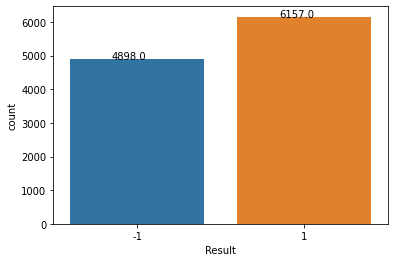

In [ ]:
ax = sns.countplot(complete_training['Result'],)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

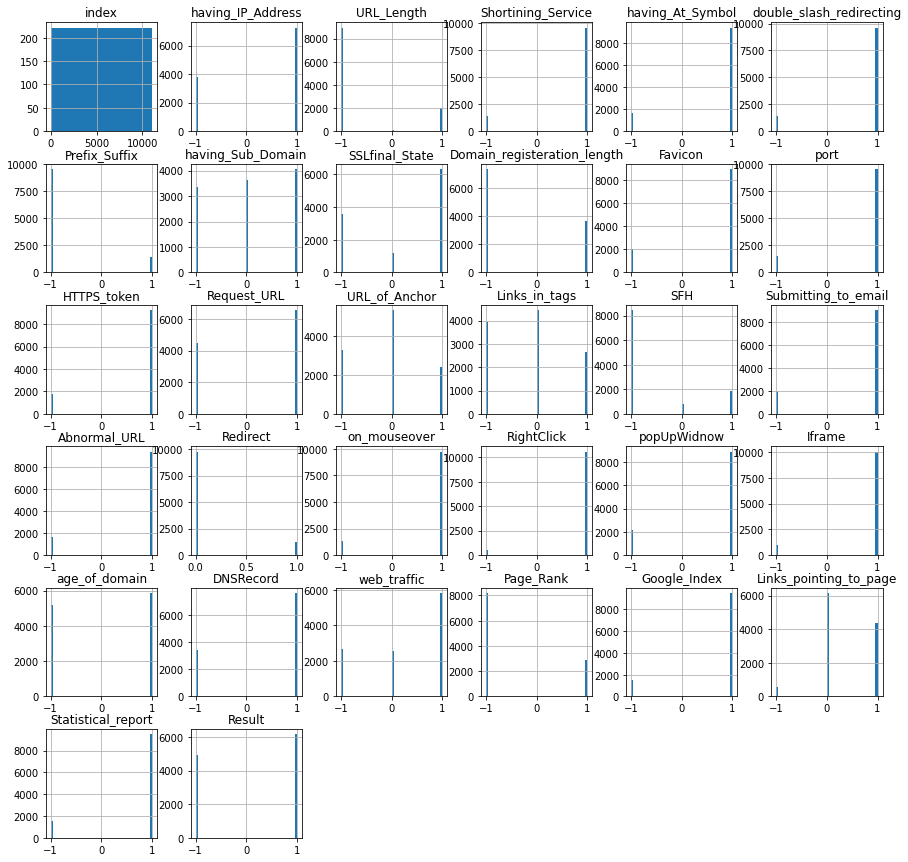

In [ ]:
#Plotting the data distribution
complete_training.hist(bins = 50,figsize = (15,15))
plt.show()

In [ ]:
def corr_heatmap(data, idx_s, idx_e):
    y = data['Result']
    temp = data.iloc[:, idx_s:idx_e]
    if 'id' in temp.columns:
        del temp['id']
    temp['Result'] = y
    sns.heatmap(temp.corr(), annot=True, fmt='.2f')
    plt.show()

We will create heatmap to check the correlation  between features variable and output variable 

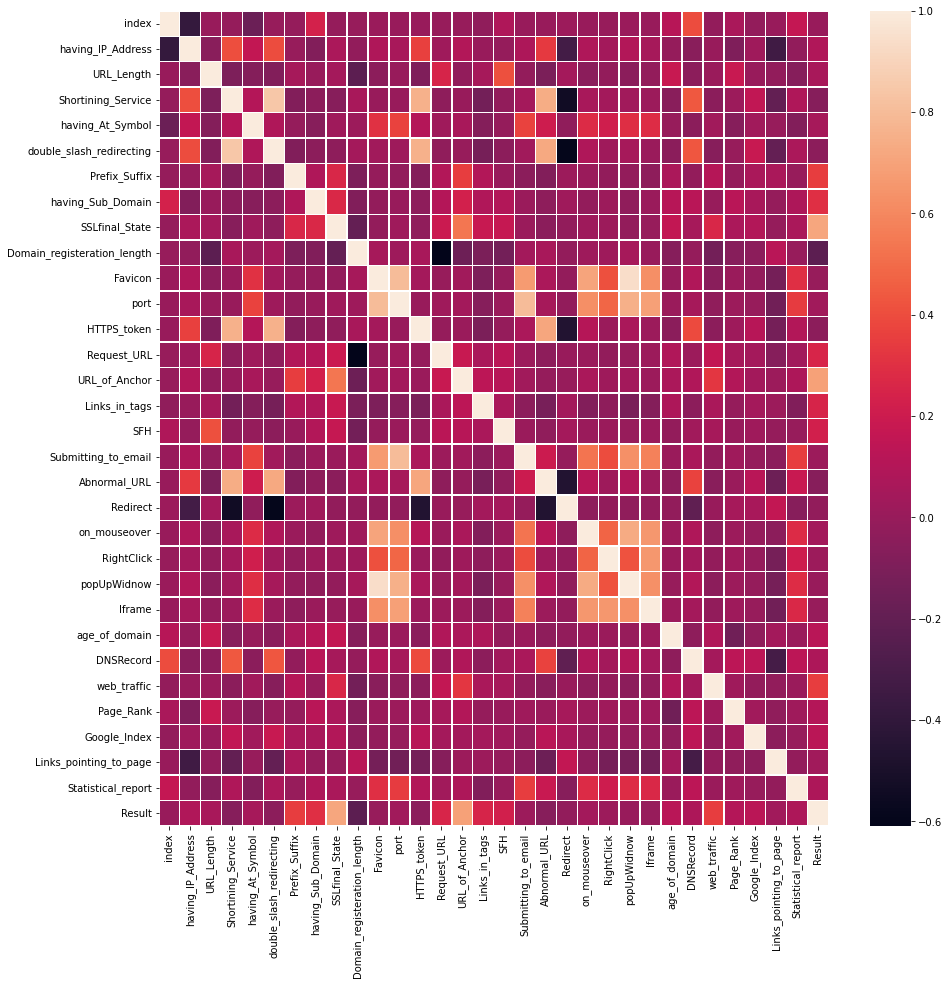

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(complete_training.corr(), linewidths=.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


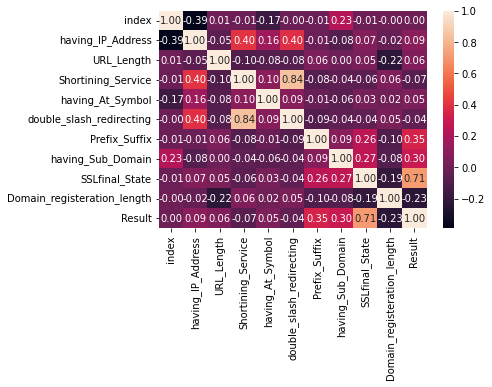

In [ ]:
corr_heatmap(complete_training, 0, 10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


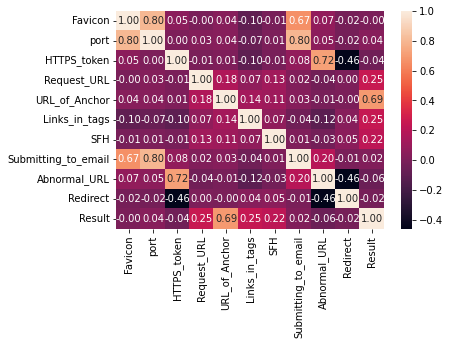

In [ ]:
corr_heatmap(complete_training, 10, 20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


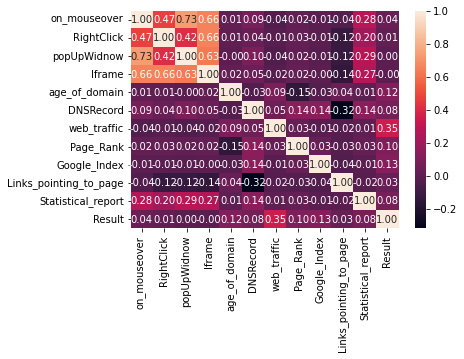

In [ ]:
corr_heatmap(complete_training, 20, 31)

Get the mutual info of the features

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
X = complete_training 

In [ ]:
y = X['Result']
X = X.drop(['index', 'Result'], axis=1)

In [ ]:
discrete_features = X.dtypes == int

In [ ]:
mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

SSLfinal_State                 3.462151e-01
URL_of_Anchor                  3.308413e-01
Prefix_Suffix                  8.555648e-02
web_traffic                    7.942919e-02
having_Sub_Domain              7.606279e-02
Links_in_tags                  3.260362e-02
Request_URL                    3.227012e-02
SFH                            2.598642e-02
Domain_registeration_length    2.550874e-02
Google_Index                   8.267184e-03
age_of_domain                  7.391656e-03
Page_Rank                      5.548433e-03
having_IP_Address              4.421668e-03
Statistical_report             3.166413e-03
Links_pointing_to_page         3.026371e-03
DNSRecord                      2.857773e-03
URL_Length                     2.630548e-03
Shortining_Service             2.347519e-03
Abnormal_URL                   1.852311e-03
having_At_Symbol               1.393854e-03
on_mouseover                   8.703541e-04
HTTPS_token                    7.995823e-04
double_slash_redirecting       7

Plot mutual information score

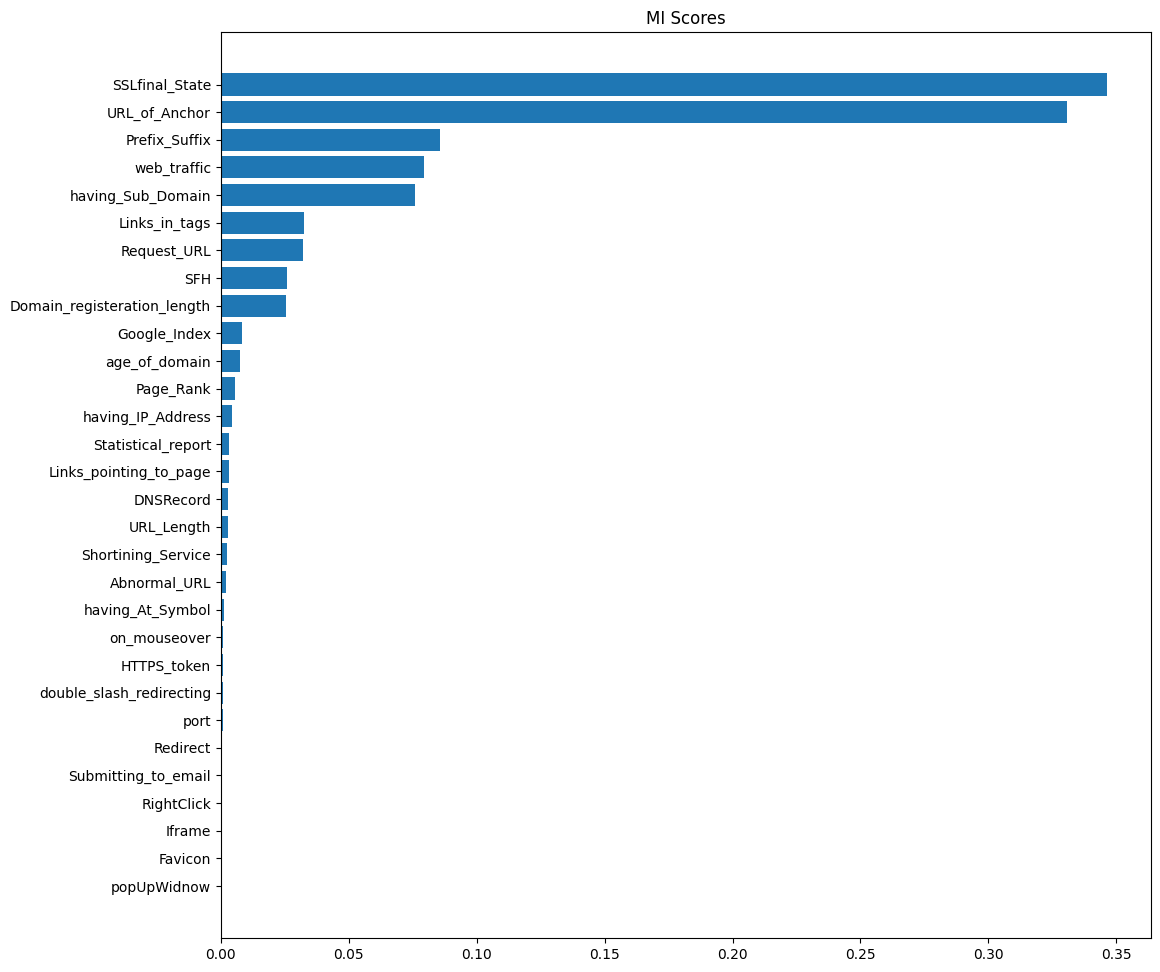

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("MI Scores")
    
plt.figure(dpi=100, figsize=(12,12))
plot_mi_scores(mi_scores)

We will drop features like pop up window, Iframe Favion, Port and Abnormal_URL 

#Pre-processing

We will drop few features such as pop up window, Iframe Favion, Port and Abnormal_URL

In [ ]:
reduced_df = complete_training[['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Redirect', 'on_mouseover', 'RightClick',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Statistical_report', 'Result']]

In [ ]:
complete_training.head()

,index,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [ ]:
reduced_df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,HTTPS_token,...,Redirect,on_mouseover,RightClick,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,-1,...,0,1,1,-1,-1,-1,-1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,-1,...,0,1,1,-1,-1,0,-1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,-1,...,0,1,1,1,-1,1,-1,1,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,-1,...,0,1,1,-1,-1,1,-1,1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,0,-1,1,-1,-1,0,-1,1,1,1


Check if any missing values are there in dataset

In [ ]:
tmp = reduced_df.isnull().sum().reset_index(name='missing_val')
tmp[tmp['missing_val']!= 0]

,index,missing_val


In [ ]:
reduced_df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,HTTPS_token,...,Redirect,on_mouseover,RightClick,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Statistical_report,Result
0,2,1,1,1,2,2,2,2,2,2,...,0,1,1,2,2,2,2,1,2,2
1,1,1,1,1,1,2,0,1,2,2,...,0,1,1,2,2,0,2,1,1,2
2,1,0,1,1,1,2,2,2,2,2,...,0,1,1,1,2,1,2,1,2,2
3,1,0,1,1,1,2,2,2,1,2,...,0,1,1,2,2,1,2,1,1,2
4,1,0,2,1,1,2,1,1,2,1,...,0,2,1,2,2,0,2,1,1,1


In [ ]:
reduced_df

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,HTTPS_token,...,Redirect,on_mouseover,RightClick,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,-1,...,0,1,1,-1,-1,-1,-1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,-1,...,0,1,1,-1,-1,0,-1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,-1,...,0,1,1,1,-1,1,-1,1,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,-1,...,0,1,1,-1,-1,1,-1,1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,0,-1,1,-1,-1,0,-1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,1,...,0,-1,-1,1,1,-1,-1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,1,...,1,-1,1,1,1,1,1,1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,0,1,1,1,1,1,-1,1,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,1,...,0,-1,1,1,1,1,-1,1,1,-1


In dataset -1, 0, 1 ->states Phishing, Suspicious, Legitimate.

We will encode negative number to a positive as some classfier are not able to handel negative input.

New mapping will be 2, 0, 1->states Phishing, Suspicious, Legitimate.


In [ ]:
for col in reduced_df.columns:
  reduced_df[col] = reduced_df[col].map({-1: 2, 0: 0, 1: 1})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


We will split data into N fold for training the models.

In [ ]:
from sklearn.model_selection import train_test_split, KFold

In [ ]:
X_reduced = reduced_df.iloc[:,0:24]
y_reduced = reduced_df.iloc[:, -1]

In [ ]:
X_reduced

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,HTTPS_token,...,Submitting_to_email,Redirect,on_mouseover,RightClick,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Statistical_report
0,2,1,1,1,2,2,2,2,2,2,...,2,0,1,1,2,2,2,2,1,2
1,1,1,1,1,1,2,0,1,2,2,...,1,0,1,1,2,2,0,2,1,1
2,1,0,1,1,1,2,2,2,2,2,...,2,0,1,1,1,2,1,2,1,2
3,1,0,1,1,1,2,2,2,1,2,...,1,0,1,1,2,2,1,2,1,1
4,1,0,2,1,1,2,1,1,2,1,...,1,0,2,1,2,2,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,2,1,2,1,1,1,1,2,1,...,2,0,2,2,1,1,2,2,1,1
11051,2,1,1,2,2,2,1,2,2,1,...,2,1,2,1,1,1,1,1,1,1
11052,1,2,1,1,1,2,1,2,2,1,...,1,0,1,1,1,1,1,2,1,1
11053,2,2,1,1,1,2,2,2,1,1,...,1,0,2,1,1,1,1,2,1,1


We are spliting whole dataset into training and test data set. We are spliting in 80:20 Ratio and also we while spliting we are spliting in a stratified fashion, using this output(Labels)

In [ ]:
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=7, stratify=y_reduced)

In [ ]:
X_test_red

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,HTTPS_token,...,Submitting_to_email,Redirect,on_mouseover,RightClick,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Statistical_report
7787,1,2,1,1,1,2,1,2,1,1,...,1,0,1,1,2,1,2,1,1,1
6370,2,2,1,1,1,2,0,1,1,1,...,1,1,1,1,2,1,1,2,1,1
6124,2,2,1,1,2,2,0,0,2,2,...,1,0,1,1,2,1,1,1,2,1
6027,2,2,1,1,1,2,0,2,1,1,...,1,0,1,1,2,1,1,1,1,1
2294,1,2,1,1,1,2,0,1,2,1,...,1,0,1,1,1,1,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10960,1,2,1,1,1,2,2,2,2,1,...,1,0,1,1,1,1,1,2,1,1
7547,1,2,1,2,1,1,1,1,2,1,...,2,0,1,1,2,1,1,2,1,1
4074,1,2,1,1,1,2,0,1,2,1,...,2,0,2,2,2,2,1,2,1,2
9066,1,2,1,1,1,2,1,1,2,1,...,1,0,1,1,1,1,2,2,1,1


In [ ]:
X_train_red.shape

(8844, 24)

In [ ]:
X_train_red = X_train_red.to_numpy()
X_test_red = X_test_red.to_numpy()
y_train_red = y_train_red.to_numpy()
y_test_red = y_test_red.to_numpy()

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [ ]:
for train, test in kf.split(X_train_red):
  print(X_train_red[train].shape, y_train_red[train].shape, X_train_red[test].shape, y_train_red[test].shape)

(7075, 24) (7075,) (1769, 24) (1769,)
(7075, 24) (7075,) (1769, 24) (1769,)
(7075, 24) (7075,) (1769, 24) (1769,)
(7075, 24) (7075,) (1769, 24) (1769,)
(7076, 24) (7076,) (1768, 24) (1768,)


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
def plot_cm(y_val, y_pred):
  labels = [1, 0]
  cm = confusion_matrix(y_val, y_pred, labels)
  # print(cm)
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(cm)
  plt.title('Confusion matrix of the classifier')
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels)
  ax.set_yticklabels([''] + labels)
  plt.xlabel('Predicted')
  plt.ylabel('True')


# Comment

Above this section we have all features and reduced set of features. Now we will try to train certain classification models on it

In report justify why did we not require any kind of resampling - undersampling/ oversampling.

Ground truth - **Categorical Naive Bayes** (needs to be redone with all features dataset)

Rest:
- Decision Tree - try to optimise parameters by Grid Search
- **Logistic Regression** - try different learning rates - also try batch, stocastic and mini-batch gradient descents.
- Random Forest
- **K-nearest neighbours**
- SVC - read about kernel and stuff
- XGBoost
- AdaBoost
- Neural Network

For each model check if data needs to be converted to One-Hot rather than Ordinal Encoded, as it is right now.

For every model, reason if K-fold or train-val split should be used. - (Probably use **K-fold for all**; can discuss this point).

For each check if the chosen set of features or the complete feature group, (can also try out random set of features; just a suggestion not sure about it) is providing better results.

Plot confusion matrix and ROC curve for each model. Report accuracy. Print classification report.

For logistic regression try different loss functions.

For each model, read up how to check for underfitting or overfitting and implement it accordingly. (PS: We do have some more datasets available so can use them for judging variance).

Can report in the end everything in a tabular format.

**Aim**: To reduce False Positives.

# Code

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


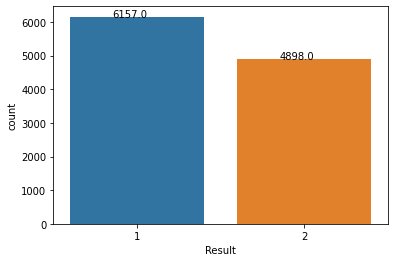

In [ ]:
ax = sns.countplot(reduced_df['Result'],)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

In [ ]:
from sklearn import metrics
from pprint import pprint
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix,  classification_report
from sklearn.metrics import accuracy_score, precision_score
from sklearn.linear_model import LogisticRegression
import pickle

#Categorical Naive Bayes

smaller class is true class (legitimate)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_reduced, test_size=0.25, random_state=0)

In [ ]:
y_reduced.unique()

array([2, 1])

In [ ]:
clf_N = CategoricalNB()
clf_N = clf_N.fit(X_train, y_train)
# we will predict data using test data set
y_pred = clf_N.predict(X_test)
cm = confusion_matrix(  y_test, y_pred)
# Create classification report for predicted values of Y and Test data for Y
report = classification_report(y_test, y_pred)
# Check accuracy of predicted values of y
acc = accuracy_score(y_test, y_pred)
print("Confusion Matrix" , cm, sep='\n')
print("Classification Report", report, sep='\n')
print( "Accuracy Score" ,acc, sep= '\n') 

Confusion Matrix
[[1437   78]
 [ 129 1120]]
Classification Report
              precision    recall  f1-score   support

           1       0.92      0.95      0.93      1515
           2       0.93      0.90      0.92      1249

    accuracy                           0.93      2764
   macro avg       0.93      0.92      0.92      2764
weighted avg       0.93      0.93      0.92      2764

Accuracy Score
0.9251085383502171


In [ ]:
for train, val in kf.split(X_train_red):
  clf_NB = CategoricalNB()
  # print(X_train_red[train].shape)
  X_train, X_test = X_train_red[train], X_train_red[val] 
  y_train, y_test = y_train_red[train], y_train_red[val]
  clf_NB = clf_NB.fit(X_train, y_train)
  # we will predict data using test data set
  # print(X_train_red[val].shape)
  y_pred = clf_NB.predict(X_test)
  # print(y_pred)
  # Create confusion matrix using predicted values of Y and Test data for Y
  cm = confusion_matrix(y_test, y_pred)
  # Create classification report for predicted values of Y and Test data for Y
  report = classification_report(y_test, y_pred)
  # Check accuracy of predicted values of y
  acc = accuracy_score(y_test, y_pred)
  # print("Confusion Matrix" , cm, sep='\n')
  # print("Classification Report", report, sep='\n')
  print( "Accuracy Score" ,acc, sep= '\n')  

Accuracy Score
0.9327303561334087
Accuracy Score
0.9202939513849633
Accuracy Score
0.933295647258338
Accuracy Score
0.93159977388355
Accuracy Score
0.9168552036199095


In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
X_train_red_onehot = encoder.fit_transform(X_train_red)
X_test_red_onehot = encoder.transform(X_test_red)


In [ ]:
pickle.dump(encoder, open("One_Hot_Encoder", 'wb'))

In [ ]:
X_train_onehot = encoder.fit_transform(X_train)
X_test_onehot = encoder.transform(X_test)

In [ ]:
clf_GN = CategoricalNB()
clf_GN = clf_GN.fit(X_train_onehot, y_train)
y_pred = clf_GN.predict(X_test_onehot)
cm = confusion_matrix(y_test, y_pred)
# Create classification report for predicted values of Y and Test data for Y
report = classification_report(y_test, y_pred)
# Check accuracy of predicted values of y
acc = accuracy_score(y_test, y_pred)
print("Confusion Matrix" , cm, sep='\n')
print("Classification Report", report, sep='\n')
print( "Accuracy Score" ,acc, sep= '\n') 

Confusion Matrix
[[891  65]
 [ 81 731]]
Classification Report
              precision    recall  f1-score   support

           1       0.92      0.93      0.92       956
           2       0.92      0.90      0.91       812

    accuracy                           0.92      1768
   macro avg       0.92      0.92      0.92      1768
weighted avg       0.92      0.92      0.92      1768

Accuracy Score
0.917420814479638


In [ ]:
def to_use_GNB(X_train_red_onehot, y_train_red):
  accuracy_scores_catNB = []
  for train, val in kf.split(X_train_red):
    clf_GNB = CategoricalNB()
    clf_GNB = clf_GNB.fit(X_train_red[train], y_train_red[train])
    tp, fn, fp, tn = metrics.confusion_matrix(y_train_red[val], clf_GNB.predict(X_train_red[val])).ravel()
    cn = confusion_matrix(y_train_red[val], clf_GNB.predict(X_train_red[val])).ravel()
    # print(cn)
    accuracy = (tn+tp)/(fp+fn+tp+tn)
    # print(accuracy)
    precision = tp/(tp+fp)
    # print(precision)
    recall = tp/(tp+fn)
    fpr = fp/(fp+tn)
    f1 = 2*precision*recall/(precision + recall)
    accuracy_scores_catNB.append([accuracy, precision, recall, fpr, f1])

  return np.mean(accuracy_scores_catNB, axis=0)

metric_GNB = to_use_GNB(X_train_red_onehot, y_train_red)
print(metric_GNB)

[0.92695499 0.92269117 0.94842488 0.09953223 0.93529719]


In [ ]:
# pickle.dump(clf_GN, open("Cat_NB_Model", 'wb'))

#K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

Find best KNN parameter

In [ ]:
def gridsearch_KNN(X_train_red_onehot, y_train_red):
  clf_knn = KNeighborsClassifier()
  knn_param_grid = {
      "n_neighbors": [3, 5, 7, 9, 15],
      "metric": ['euclidean', 'manhattan']
  }

  gs_knn = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv = 3)
  gs_results = gs_knn.fit(X_train_red_onehot, y_train_red)

  return gs_results.best_params_

bestparams_knn = gridsearch_KNN(X_train_red_onehot, y_train_red)
print(bestparams_knn)

{'metric': 'euclidean', 'n_neighbors': 3}


In [ ]:
clf_neig = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
clf_neig = clf_neig.fit(X_train, y_train)
y_pred   = clf_neig.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# Create classification report for predicted values of Y and Test data for Y
report = classification_report(y_test, y_pred)
# Check accuracy of predicted values of y
acc = accuracy_score(y_test, y_pred)
print("Confusion Matrix" , cm, sep='\n')
print("Classification Report", report, sep='\n')
print( "Accuracy Score" ,acc, sep= '\n') 

Confusion Matrix
[[923  33]
 [ 74 738]]
Classification Report
              precision    recall  f1-score   support

           1       0.93      0.97      0.95       956
           2       0.96      0.91      0.93       812

    accuracy                           0.94      1768
   macro avg       0.94      0.94      0.94      1768
weighted avg       0.94      0.94      0.94      1768

Accuracy Score
0.9394796380090498


In [ ]:
def to_use_KNN(X_train_red_onehot, y_train_red):
  accuracy_scores_catKNN = []
  for train, val in kf.split(X_train_red):
    clf_neigh = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
    clf_neigh = clf_neigh.fit(X_train_red_onehot[train], y_train_red[train])

    y_pred = clf_neigh.predict(X_train_red_onehot[val])
    tp, fn, fp, tn = metrics.confusion_matrix(y_train_red[val], y_pred).ravel()
    # Create confusion matrix using predicted values of Y and Test data for Y
    cm = confusion_matrix(y_train_red[val], y_pred)
    # Create classification report for predicted values of Y and Test data for Y
    report = classification_report(y_train_red[val], y_pred)
    # Check accuracy of predicted values of y
    accuracy = accuracy_score(y_train_red[val], y_pred)
    # print("Confusion Matrix" , cm, sep='\n')
    # print("Classification Report", report, sep='\n')
    # print( "Accuracy Score" ,accuracy, sep= '\n')
    precision = precision_score(y_train_red[val], y_pred)
    recall = tp/(tp+fn)
    fpr = fp/(fp+tn)
    f1 = 2*precision*recall/(precision + recall)
    accuracy_scores_catKNN.append([accuracy, precision, recall, fpr, f1])

  return np.mean(accuracy_scores_catKNN, axis=0)

metric_knn = to_use_KNN(X_train_red_onehot, y_train_red)
print(metric_knn)

[0.95194386 0.94796221 0.96682345 0.06636397 0.95724686]


In [ ]:
# pickle.dump(clf_neig, open("KNN_Model", 'wb'))

# XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
clf_xgb = XGBClassifier(silent=False, 
                        scale_pos_weight=1,
                        learning_rate=0.01,  
                        colsample_bytree = 0.4,
                        subsample = 0.8,
                        objective='binary:logistic', 
                        n_estimators=1000, 
                        reg_alpha = 0.3,
                        max_depth=4, 
                        gamma=10)
clf_xgb = clf_xgb.fit(X_train_onehot, y_train)
y_pred  = clf_xgb.predict(X_test_onehot)
cm = confusion_matrix(y_test, y_pred)
# Create classification report for predicted values of Y and Test data for Y
report = classification_report(y_test, y_pred)
# Check accuracy of predicted values of y
acc = accuracy_score(y_test, y_pred)
print("Confusion Matrix" , cm, sep='\n')
print("Classification Report", report, sep='\n')
print( "Accuracy Score" ,acc, sep= '\n') 

Confusion Matrix
[[909  47]
 [ 65 747]]
Classification Report
              precision    recall  f1-score   support

           1       0.93      0.95      0.94       956
           2       0.94      0.92      0.93       812

    accuracy                           0.94      1768
   macro avg       0.94      0.94      0.94      1768
weighted avg       0.94      0.94      0.94      1768

Accuracy Score
0.9366515837104072


In [ ]:
def to_use_XGB(X_train_red_onehot, y_train_red):
  accuracy_scores_xgb = []
  for train, val in kf.split(X_train_red):
    clf_xgb = XGBClassifier(silent=False, 
                        scale_pos_weight=1,
                        learning_rate=0.01,  
                        colsample_bytree = 0.4,
                        subsample = 0.8,
                        objective='binary:logistic', 
                        n_estimators=1000, 
                        reg_alpha = 0.3,
                        max_depth=4, 
                        gamma=10)
    clf_xgb = clf_xgb.fit(X_train_red_onehot[train], y_train_red[train])
    tp, fn, fp, tn = metrics.confusion_matrix(y_train_red[val], clf_xgb.predict(X_train_red_onehot[val])).ravel()
    accuracy = (tn+tp)/(fp+fn+tp+tn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    fpr = fp/(fp+tn)
    f1 = 2*precision*recall/(precision + recall)
    accuracy_scores_xgb.append((accuracy, precision, recall, fpr, f1))

    return np.mean(accuracy_scores_xgb, axis=0)
    
metric_xgb = to_use_XGB(X_train_red_onehot, y_train_red)
print(metric_xgb)

[0.94742793 0.94099695 0.96354167 0.07169345 0.95213587]


In [ ]:
# pickle.dump(clf_xgb, open("XGB_Model", 'wb'))

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
def grid_search_decision_tree(X_train_red_onehot, y_train_red):
  dt = DecisionTreeClassifier(random_state=5)
  p = {"max_depth": range(1,20), "random_state":[5]}
  param_grid = { 
      # 'n_estimators': [100, 200, 700],
      'max_features': ['auto', 'sqrt', 'log2'],
      'max_depth'   : range(1,20),
      'random_state': [5]
  }

  gs = GridSearchCV(estimator=dt,param_grid=param_grid)
  gs_fit = gs.fit(X_train_red, y_train_red)
  return gs_fit.best_params_

best_params_decision_tree = grid_search_decision_tree(X_train_red_onehot, y_train_red)
print(best_params_decision_tree)

{'max_depth': 19, 'max_features': 'auto', 'random_state': 5}


In [ ]:
dt = DecisionTreeClassifier( random_state=5, max_depth=19)
dt = dt.fit(X_train, y_train)
y_pred  = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# Create classification report for predicted values of Y and Test data for Y
report = classification_report(y_test, y_pred)
# Check accuracy of predicted values of y
acc = accuracy_score(y_test, y_pred)
print("Confusion Matrix" , cm, sep='\n')
print("Classification Report", report, sep='\n')
print( "Accuracy Score" ,acc, sep= '\n') 

Confusion Matrix
[[920  36]
 [ 58 754]]
Classification Report
              precision    recall  f1-score   support

           1       0.94      0.96      0.95       956
           2       0.95      0.93      0.94       812

    accuracy                           0.95      1768
   macro avg       0.95      0.95      0.95      1768
weighted avg       0.95      0.95      0.95      1768

Accuracy Score
0.9468325791855203


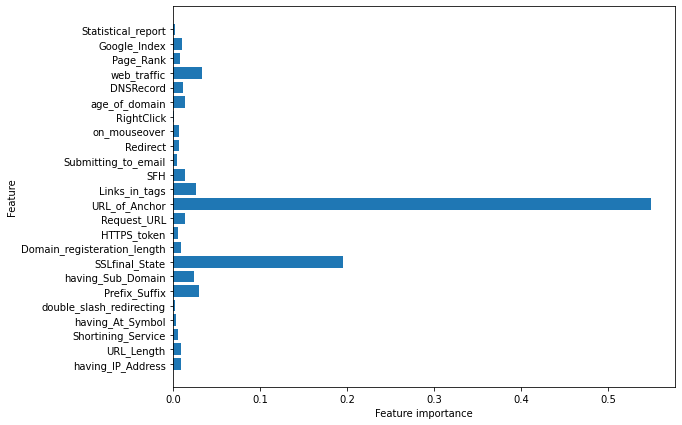

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), dt.feature_importances_, align='center')
plt.yticks(np.arange(n_features), reduced_df.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
def to_use_decisiontree(X_train_red_onehot, y_train_red):
  accuracy_scores_dt = []
  for train, val in kf.split(X_train_red):
      dt = DecisionTreeClassifier(random_state=5, max_depth=19)
      dt = dt.fit(X_train_red[train], y_train_red[train])
      tp, fn, fp, tn = metrics.confusion_matrix(y_train_red[val],dt.predict(X_train_red[val])).ravel()
      dt_accuracy = (tn+tp)/(tp+tn+fp+fn)
      dt_prec = tp/(tp+fp)
      dt_rec = tp/(tp+fn)
      dt_fpr = fp/(fp+tn)
      dt_f1 = 2*dt_prec*dt_rec/(dt_prec+dt_rec)
      accuracy_scores_dt.append((dt_accuracy,dt_prec,dt_rec,dt_fpr,dt_f1))
  
  return np.mean(accuracy_scores_dt,axis=0)

metric_decision_tree = to_use_decisiontree(X_train_red_onehot, y_train_red)
print(metric_decision_tree)

[0.95250953 0.94997345 0.9655576  0.06371379 0.95767933]


In [ ]:
# pickle.dump(dt, open("Decision_Tree_Model", 'wb'))

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def grid_search_random_forest(X_train_red_onehot, y_train_red):
  rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 
  param_grid = { 
      'n_estimators': [100, 200, 400],
      'max_features': ['auto', 'sqrt', 'log2'],
      'max_depth'   : range(1,20)
  }
  CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
  CV_rfc.fit(X_train_red, y_train_red)
  return CV_rfc.best_params_

best_params_rfc = grid_search_random_forest(X_train_red_onehot, y_train_red)
print(best_params_rfc)

{'max_depth': 17, 'max_features': 'sqrt', 'n_estimators': 400}


In [ ]:
X_train.shape

(7076, 24)

In [ ]:
rforest = RandomForestClassifier(max_features= 'sqrt' ,n_estimators=200)
rforest = rforest.fit(X_train, y_train)
y_pred  = rforest.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# Create classification report for predicted values of Y and Test data for Y
report = classification_report(y_test, y_pred)
# Check accuracy of predicted values of y
acc = accuracy_score(y_test, y_pred)
print("Confusion Matrix" , cm, sep='\n')
print("Classification Report", report, sep='\n')
print( "Accuracy Score" ,acc, sep= '\n') 

Confusion Matrix
[[921  35]
 [ 39 773]]
Classification Report
              precision    recall  f1-score   support

           1       0.96      0.96      0.96       956
           2       0.96      0.95      0.95       812

    accuracy                           0.96      1768
   macro avg       0.96      0.96      0.96      1768
weighted avg       0.96      0.96      0.96      1768

Accuracy Score
0.9581447963800905


In [ ]:
# pickle.dump(rforest, open("Random_Forest_Model", 'wb'))

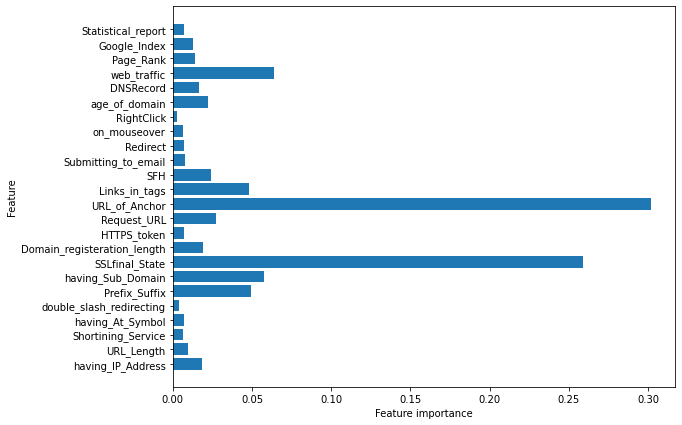

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), rforest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), reduced_df.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
def to_use_rfc(X_train_red_onehot, y_train_red):
  accuracy_scores_forest = []
  for train, val in kf.split(X_train_red):
      rforest = RandomForestClassifier(max_features= 'sqrt' ,n_estimators=200)
      rforest = rforest.fit(X_train_red_onehot[train],y_train_red[train])
      tp1, fn1, fp1, tn1 = metrics.confusion_matrix(y_train_red[val],rforest.predict(X_train_red_onehot[val])).ravel()
      r_accuracy = (tn1 + tp1)/(tn1+tp1+fn1+fp1)
      r_prec = tp1/(tp1+fp1)
      r_rec = tp1/(tp1+fn1)
      r_fpr = fp1/(fp1+tn1)
      r_f1 = 2*(r_prec)*r_rec/(r_prec+r_rec)
      accuracy_scores_forest.append((r_accuracy,r_prec,r_rec,r_fpr,r_f1))

  pickle.dump(rforest, open("Random_Forest_Model", 'wb'))
  return np.mean(accuracy_scores_forest, axis=0)
  

metric_rforest = to_use_rfc(X_train_red_onehot, y_train_red)
print(metric_rforest)

[0.96449505 0.96243524 0.97426605 0.04760726 0.96827803]


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from pprint import pprint

In [ ]:
log = LogisticRegression(max_iter = 2500)
log = log.fit(X_train_onehot, y_train)
y_pred  = log.predict(X_test_onehot)
cm = confusion_matrix(y_test, y_pred)
# Create classification report for predicted values of Y and Test data for Y
report = classification_report(y_test, y_pred)
# Check accuracy of predicted values of y
acc = accuracy_score(y_test, y_pred)
print("Confusion Matrix" , cm, sep='\n')
print("Classification Report", report, sep='\n')
print( "Accuracy Score" ,acc, sep= '\n') 

Confusion Matrix
[[905  51]
 [ 79 733]]
Classification Report
              precision    recall  f1-score   support

           1       0.92      0.95      0.93       956
           2       0.93      0.90      0.92       812

    accuracy                           0.93      1768
   macro avg       0.93      0.92      0.93      1768
weighted avg       0.93      0.93      0.93      1768

Accuracy Score
0.9264705882352942


In [ ]:
def to_use_logistic(X_train_red_onehot, y_train_red):

  accuracy_scores_log = []
  for train, val in kf.split(X_train_red_onehot):
    log = LogisticRegression(max_iter = 2500)
    log = log.fit(X_train_red_onehot[train], y_train_red[train])
    tp, fn, fp, tn = metrics.confusion_matrix(y_train_red[val], log.predict(X_train_red_onehot[val])).ravel()
    accuracy = (tn+tp)/(fp+fn+tp+tn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    fpr = fp/(fp+tn)
    f1 = 2*precision*recall/(precision + recall)
    accuracy_scores_log.append((accuracy, precision, recall, fpr, f1))
  
  return np.mean(accuracy_scores_log, axis=0)

metric_logistic = to_use_logistic(X_train_red_onehot, y_train_red)
print(metric_logistic)

[0.93136534 0.93001834 0.94810146 0.08953516 0.93895376]


In [ ]:
# pickle.dump(log, open("Logistic_Model", 'wb'))

## SVC

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [ ]:
# def grid_search_svm(X_train_red_onehot, y_train_red):
#   svm_clf = svm.SVC()
#   param_grid = {'C': [0.001, 0.1, 1, 10, 100,1000],  
#                 'gamma': [10,1, 0.1, 0.01, 0.001,0.0001], 
#                 'kernel': ['rbf', 'linear']}  

#   gs_svm = GridSearchCV(svm.SVC(), param_grid, cv = 3)
#   gs_results = gs_svm.fit(X_train_red_onehot, y_train_red)

#   return gs_results.best_params_

# bestparams_svm = grid_search_svm(X_train_red_onehot, y_train_red)
# print(bestparams_svm)

In [ ]:
svm_clf = svm.SVC(kernel='rbf', gamma = 0.1, C = 10, probability=True)
svm_clf = svm_clf.fit(X_train_onehot, y_train)
y_pred  = svm_clf.predict(X_test_onehot)
cm = confusion_matrix(y_test, y_pred)
# Create classification report for predicted values of Y and Test data for Y
report = classification_report(y_test, y_pred)
# Check accuracy of predicted values of y
acc = accuracy_score(y_test, y_pred)
print("Confusion Matrix" , cm, sep='\n')
print("Classification Report", report, sep='\n')
print( "Accuracy Score" ,acc, sep= '\n')

Confusion Matrix
[[916  40]
 [ 49 763]]
Classification Report
              precision    recall  f1-score   support

           1       0.95      0.96      0.95       956
           2       0.95      0.94      0.94       812

    accuracy                           0.95      1768
   macro avg       0.95      0.95      0.95      1768
weighted avg       0.95      0.95      0.95      1768

Accuracy Score
0.9496606334841629


In [ ]:
def to_use_SVM(X_train_red_onehot, y_train_red):
  accuracy_scores_svm = []
  for train, val in kf.split(X_train_red_onehot):
    svm_clf = svm.SVC(kernel='rbf', gamma = 0.1, C = 10, probability=True)
    svm_clf = svm_clf.fit(X_train_red_onehot[train], y_train_red[train])
    tp, fn, fp, tn = metrics.confusion_matrix(y_train_red[val], svm_clf.predict(X_train_red_onehot[val])).ravel()
    # plot_cm(y_train_red[val], svm_clf.predict(X_train_red_onehot[val]))
    
    accuracy = (tn+tp)/(fp+fn+tp+tn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    fpr = fp/(fp+tn)
    f1 = 2*precision*recall/(precision + recall)
    accuracy_scores_svm.append((accuracy, precision, recall, fpr, f1))


  return np.mean(accuracy_scores_svm, axis=0)

metric_svm = to_use_SVM(X_train_red_onehot, y_train_red)
print(metric_svm)


[0.9599717  0.9604264  0.96794361 0.04988318 0.96414498]


In [ ]:
import pickle
# pickle.dump(encoder, open("One_Hot_Encoder", 'wb'))

In [ ]:
def to_test_SVM(X_test_red_onehot, y_test_red, X_train_red_onehot, y_train_red):
  svm_clf = svm.SVC(kernel='rbf', gamma = 0.1, C = 10, probability=True)
  svm_clf = svm_clf.fit(X_train_red_onehot, y_train_red)
  tp, fn, fp, tn = metrics.confusion_matrix(y_test_red, svm_clf.predict(X_test_red_onehot)).ravel()
  accuracy = (tn+tp)/(fp+fn+tp+tn)
  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  fpr = fp/(fp+tn)
  f1 = 2*precision*recall/(precision + recall)
  pickle.dump(svm_clf, open("SVM_Final_Model", 'wb'))
  return accuracy

test_accuracy = to_test_SVM(X_test_red_onehot, y_test_red, X_train_red_onehot, y_train_red)
print(test_accuracy)

0.9678878335594754


In [ ]:
filename_dt = 'SVM_Final_Model'
loaded_model = pickle.load(open(filename_dt, 'rb'))
tp, fn, fp, tn = metrics.confusion_matrix(y_train_red, loaded_model.predict(X_train_red_onehot)).ravel()
accuracy = (tn+tp)/(fp+fn+tp+tn)
recall = tp/(tp+fn)
fpr = fp/(fp+tn)
print(accuracy)
print(recall)
print(fpr)


0.9804387155133424
0.985586682907024
0.026033690658499236


In [ ]:
filename_dt = 'SVM_Final_Model'
loaded_model = pickle.load(open(filename_dt, 'rb'))
tp, fn, fp, tn = metrics.confusion_matrix(y_test_red, loaded_model.predict(X_test_red_onehot)).ravel()
accuracy = (tn+tp)/(fp+fn+tp+tn)
recall = tp/(tp+fn)
fpr = fp/(fp+tn)
print(accuracy)
print(recall)
print(fpr)

0.9678878335594754
0.9699431356620634
0.03469387755102041


In [ ]:
print(metric_GNB)
print(metric_knn)
print(metric_xgb)
print(metric_decision_tree)
print(metric_rforest)
print(metric_logistic)
print(metric_svm)

[0.92695499 0.92269117 0.94842488 0.09953223 0.93529719]
[0.95194386 0.94796221 0.96682345 0.06636397 0.95724686]
[0.94742793 0.94099695 0.96354167 0.07169345 0.95213587]
[0.95250953 0.94997345 0.9655576  0.06371379 0.95767933]
[0.96449505 0.96243524 0.97426605 0.04760726 0.96827803]
[0.93136534 0.93001834 0.94810146 0.08953516 0.93895376]
[0.9599717  0.9604264  0.96794361 0.04988318 0.96414498]


In [ ]:
metric_GNB = metric_GNB.tolist()
metric_knn = metric_knn.tolist()
metric_xgb = metric_xgb.tolist()

In [ ]:
metric_decision_tree = metric_decision_tree.tolist()
metric_rforest = metric_rforest.tolist()
metric_logistic = metric_logistic.tolist()
metric_svm = metric_svm.tolist()

In [ ]:
print(type(metric_GNB))

<class 'list'>


In [ ]:
all_metric = []

In [ ]:
all_metric.append(metric_GNB)
all_metric.append(metric_knn)
all_metric.append(metric_xgb)
all_metric.append(metric_decision_tree)
all_metric.append(metric_rforest)
all_metric.append(metric_logistic)
all_metric.append(metric_svm)

In [ ]:
# all_metric

In [ ]:
print(type(all_metric))

<class 'list'>


In [ ]:
df = pd.DataFrame(all_metric)

In [ ]:
df.columns = ['accuracy', 'precision', 'recall', 'fpr', 'f1']


In [ ]:
df.insert(0, "Model", ['Cat_NB', 'KNN', 'XGB', 'Decision Tree', 'Random Forest', 'Logistic', 'SVM'], True)

In [ ]:
df1 = df.sort_values('accuracy')
df1

,Model,accuracy,precision,recall,fpr,f1
0,Cat_NB,0.926955,0.922691,0.948425,0.099532,0.935297
5,Logistic,0.931365,0.930018,0.948101,0.089535,0.938954
2,XGB,0.947428,0.940997,0.963542,0.071693,0.952136
1,KNN,0.951944,0.947962,0.966823,0.066364,0.957247
3,Decision Tree,0.952510,0.949973,0.965558,0.063714,0.957679
6,SVM,0.959972,0.960426,0.967944,0.049883,0.964145
4,Random Forest,0.964495,0.962435,0.974266,0.047607,0.968278


In [ ]:
df.to_csv('Model Eval.csv')

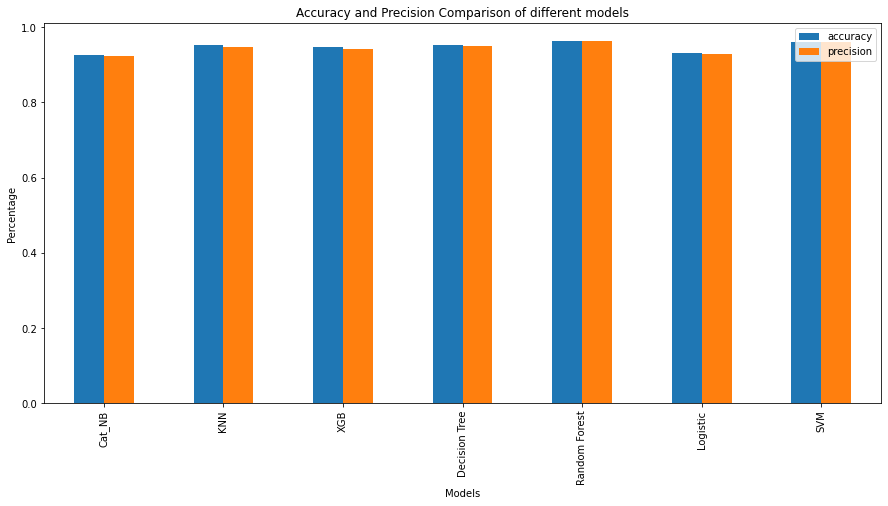

In [ ]:
ax = df.plot.bar(x = 'Model', y = ['accuracy', 'precision'],title ='Accuracy and Precision Comparison of different models',
                 figsize = (15,7), legend = True , xlabel = 'Models', ylabel = 'Percentage',
                 sort_columns = True)


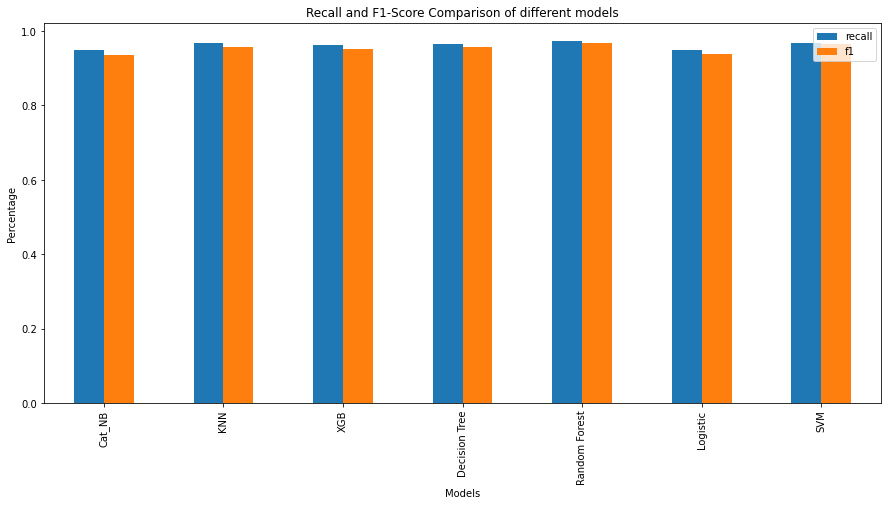

In [ ]:
ax = df.plot(x = 'Model', y = ['recall', 'f1'],kind = 'bar',title ='Recall and F1-Score Comparison of different models',
                 figsize = (15,7), legend = True , xlabel = 'Models', ylabel = 'Percentage',
                 sort_columns = True)

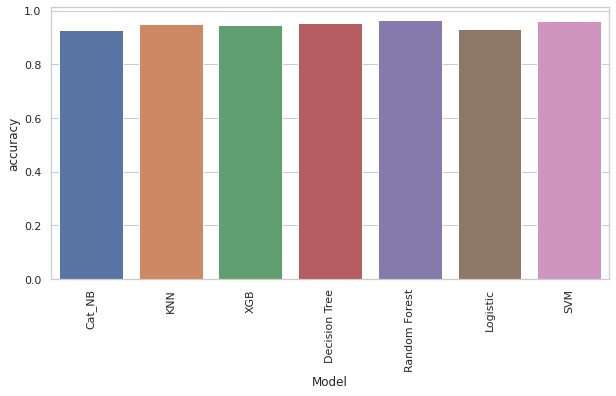

In [ ]:
#plotting the accuracy scores
 
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=df.Model, y="accuracy", data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

# Ensemble 

In [ ]:
# {'max_depth': 16, 'max_features': 'auto', 'n_estimators': 100}
# {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
X_train_red_onehot = encoder.fit_transform(X_train_red)
X_test_red_onehot = encoder.transform(X_test_red)


In [ ]:
pickle.dump(encoder, open("One_Hot_Encoder", 'wb'))

In [ ]:
kfold = model_selection.KFold(n_splits=5, random_state=0, shuffle = True)
# create the sub models
estimators = []
model1 = RandomForestClassifier(max_features = 'auto' ,n_estimators=100, max_depth=16)
model1.fit(X_train,y_train)
estimators.append(('Random Forest', model1))
model2 = DecisionTreeClassifier(max_features = 'auto', random_state=5, max_depth=19)
model2.fit(X_train,y_train)
estimators.append(('DT', model2))
model3 = svm.SVC(kernel='rbf', gamma = 0.1, C = 10, probability=True)
model3.fit(X_train,y_train)
estimators.append(('svm', model3))
# model4 =  KNeighborsClassifier(n_neighbors=3, metric='euclidean')
# estimators.append(('KNN', model4))
# clf_neigh = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
# create the ensemble model
ensemble = VotingClassifier(estimators=estimators, voting='hard')
results = model_selection.cross_val_score(ensemble, X_train, y_train, cv=kfold)

In [ ]:
def to_use_ensemble(X_train_red_onehot, y_train_red):
  accuracy_scores_dt = []
  for train, val in kf.split(X_train_red):
      # en = DecisionTreeClassifier(random_state=5, max_depth=19)
      ensemble = VotingClassifier(estimators=estimators, voting='hard')
      ensemble = ensemble.fit(X_train_red[train], y_train_red[train])
      tp, fn, fp, tn = metrics.confusion_matrix(y_train_red[val],ensemble.predict(X_train_red[val])).ravel()
      en_accuracy = (tn+tp)/(tp+tn+fp+fn)
      en_prec = tp/(tp+fp)
      en_rec = tp/(tp+fn)
      en_fpr = fp/(fp+tn)
      en_f1 = 2*en_prec*en_rec/(en_prec+en_rec)
      accuracy_scores_dt.append((en_accuracy,en_prec,en_rec,en_fpr,en_f1))
  
  return np.mean(accuracy_scores_dt,axis=0)

metric_ensemble = to_use_ensemble(X_train_red_onehot, y_train_red)
print(metric_ensemble)

[0.96189497 0.9567384  0.97575835 0.05527942 0.96612105]


In [ ]:
metric_ensemble = metric_ensemble.tolist()

In [ ]:
metric_ensemble

[0.9618949658395339,
 0.956738404557924,
 0.9757583488092841,
 0.055279421742552314,
 0.966121045222635]

In [ ]:
df = pd.DataFrame(all_metric)
df

,0,1,2,3,4
0,0.926955,0.922691,0.948425,0.099532,0.935297
1,0.951944,0.947962,0.966823,0.066364,0.957247
2,0.947428,0.940997,0.963542,0.071693,0.952136
3,0.952510,0.949973,0.965558,0.063714,0.957679
4,0.964495,0.962435,0.974266,0.047607,0.968278
5,0.931365,0.930018,0.948101,0.089535,0.938954
6,0.959972,0.960426,0.967944,0.049883,0.964145


In [ ]:
new_mat = all_metric

In [ ]:
new_mat.append(metric_ensemble)

In [ ]:
# del all_metric[-1]

In [ ]:
# all_metric

In [ ]:
df = pd.DataFrame(new_mat)

In [ ]:
df

,0,1,2,3,4
0,0.926955,0.922691,0.948425,0.099532,0.935297
1,0.951944,0.947962,0.966823,0.066364,0.957247
2,0.947428,0.940997,0.963542,0.071693,0.952136
3,0.952510,0.949973,0.965558,0.063714,0.957679
4,0.964495,0.962435,0.974266,0.047607,0.968278
5,0.931365,0.930018,0.948101,0.089535,0.938954
6,0.959972,0.960426,0.967944,0.049883,0.964145
7,0.961895,0.956738,0.975758,0.055279,0.966121


In [ ]:
# df = df.drop('6')

In [ ]:
df.columns = ['accuracy', 'precision', 'recall', 'fpr', 'f1']


In [ ]:
df.insert(0, "Model", ['Cat_NB', 'KNN', 'XGB', 'Decision Tree', 'Random Forest', 'Logistic', 'SVM', 'Ensemble'], True)

In [ ]:
df1 = df.sort_values('accuracy')
df1

,Model,accuracy,precision,recall,fpr,f1
0,Cat_NB,0.926955,0.922691,0.948425,0.099532,0.935297
5,Logistic,0.931365,0.930018,0.948101,0.089535,0.938954
2,XGB,0.947428,0.940997,0.963542,0.071693,0.952136
1,KNN,0.951944,0.947962,0.966823,0.066364,0.957247
3,Decision Tree,0.952510,0.949973,0.965558,0.063714,0.957679
6,SVM,0.959972,0.960426,0.967944,0.049883,0.964145
7,Ensemble,0.961895,0.956738,0.975758,0.055279,0.966121
4,Random Forest,0.964495,0.962435,0.974266,0.047607,0.968278


In [ ]:
# df = df.drop(index=7)

In [ ]:
df

,Model,accuracy,precision,recall,fpr,f1
0,Cat_NB,0.926955,0.922691,0.948425,0.099532,0.935297
1,KNN,0.951944,0.947962,0.966823,0.066364,0.957247
2,XGB,0.947428,0.940997,0.963542,0.071693,0.952136
3,Decision Tree,0.952510,0.949973,0.965558,0.063714,0.957679
4,Random Forest,0.964495,0.962435,0.974266,0.047607,0.968278
5,Logistic,0.931365,0.930018,0.948101,0.089535,0.938954
6,SVM,0.959972,0.960426,0.967944,0.049883,0.964145
7,Ensemble,0.961895,0.956738,0.975758,0.055279,0.966121


In [ ]:
df1 = df.sort_values('accuracy')
df1

,Model,accuracy,precision,recall,fpr,f1
0,Cat_NB,0.926955,0.922691,0.948425,0.099532,0.935297
5,Logistic,0.931365,0.930018,0.948101,0.089535,0.938954
2,XGB,0.947428,0.940997,0.963542,0.071693,0.952136
1,KNN,0.951944,0.947962,0.966823,0.066364,0.957247
3,Decision Tree,0.952510,0.949973,0.965558,0.063714,0.957679
6,SVM,0.959972,0.960426,0.967944,0.049883,0.964145
7,Ensemble,0.961895,0.956738,0.975758,0.055279,0.966121
4,Random Forest,0.964495,0.962435,0.974266,0.047607,0.968278


In [ ]:
# df.to_csv('Model Eval.csv')

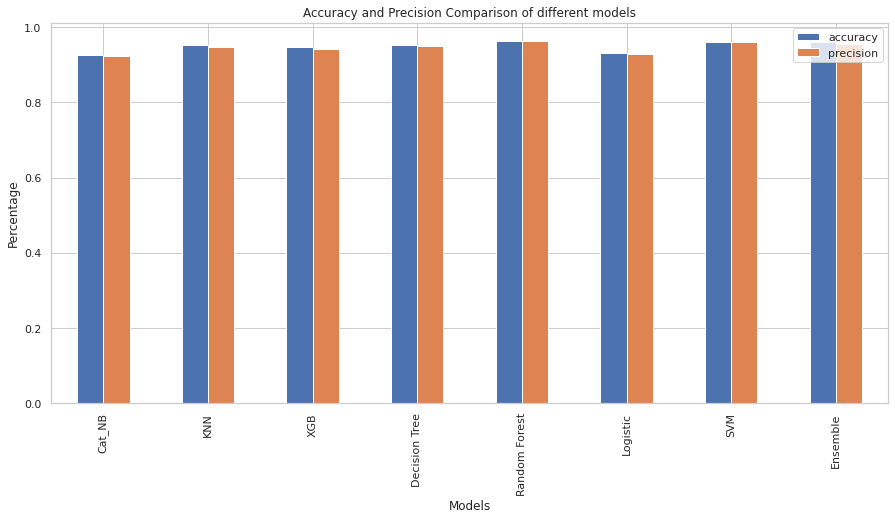

In [ ]:
ax = df.plot.bar(x = 'Model', y = ['accuracy', 'precision'],title ='Accuracy and Precision Comparison of different models',
                 figsize = (15,7), legend = True , xlabel = 'Models', ylabel = 'Percentage',
                 sort_columns = True)


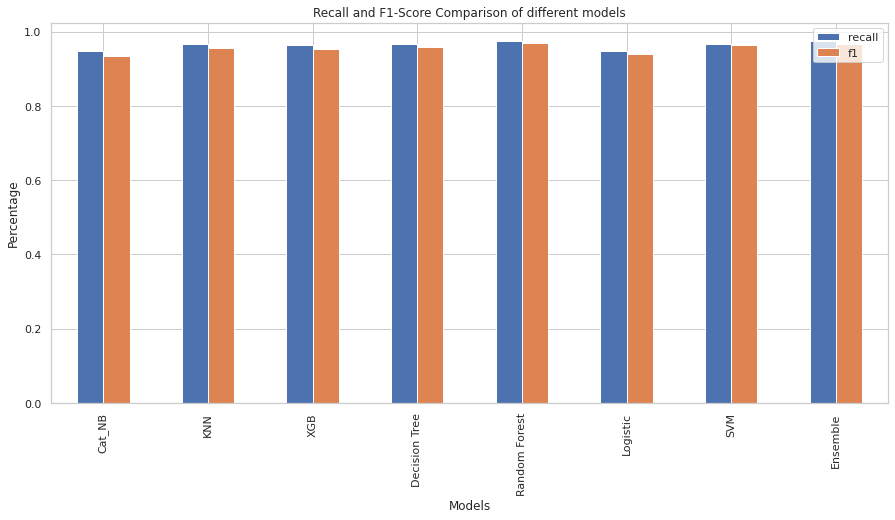

In [ ]:
ax = df.plot(x = 'Model', y = ['recall', 'f1'],kind = 'bar',title ='Recall and F1-Score Comparison of different models',
                 figsize = (15,7), legend = True , xlabel = 'Models', ylabel = 'Percentage',
                 sort_columns = True)

In [ ]:
print(results)

[0.95550847 0.96607774 0.96678445 0.95971731 0.96254417]


In [ ]:
print(results.mean())

0.9621264298975865


In [ ]:
print(results)
print(results.mean())

[0.95550847 0.96607774 0.96678445 0.95971731 0.96254417]
0.9621264298975865


In [ ]:
pickle.dump(ensemble, open("Ensemble_Model_Nor", 'wb'))

In [ ]:
ensemble

VotingClassifier(estimators=[('Random Forest',
                              RandomForestClassifier(max_depth=16)),
                             ('DT',
                              DecisionTreeClassifier(max_depth=19,
                                                     max_features='auto',
                                                     random_state=5)),
                             ('svm', SVC(C=10, gamma=0.1, probability=True))])

In [ ]:
X_train

array([[1, 2, 1, ..., 2, 1, 2],
       [2, 2, 1, ..., 2, 1, 1],
       [2, 1, 1, ..., 2, 1, 1],
       ...,
       [1, 2, 1, ..., 2, 1, 1],
       [1, 2, 1, ..., 2, 1, 1],
       [2, 2, 2, ..., 1, 1, 1]])

In [ ]:
X_Reduced = reduced_df.iloc[:,0:24]
y_Reduced = reduced_df.iloc[:, -1]

In [ ]:
X_Train, X_Test, y_Train, y_Test = train_test_split(X_Reduced, y_Reduced, test_size=0.2, random_state=7, stratify=y_reduced)

In [ ]:
reduced_df

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,HTTPS_token,...,Redirect,on_mouseover,RightClick,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Statistical_report,Result
0,2,1,1,1,2,2,2,2,2,2,...,0,1,1,2,2,2,2,1,2,2
1,1,1,1,1,1,2,0,1,2,2,...,0,1,1,2,2,0,2,1,1,2
2,1,0,1,1,1,2,2,2,2,2,...,0,1,1,1,2,1,2,1,2,2
3,1,0,1,1,1,2,2,2,1,2,...,0,1,1,2,2,1,2,1,1,2
4,1,0,2,1,1,2,1,1,2,1,...,0,2,1,2,2,0,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,2,1,2,1,1,1,1,2,1,...,0,2,2,1,1,2,2,1,1,1
11051,2,1,1,2,2,2,1,2,2,1,...,1,2,1,1,1,1,1,1,1,2
11052,1,2,1,1,1,2,1,2,2,1,...,0,1,1,1,1,1,2,1,1,2
11053,2,2,1,1,1,2,2,2,1,1,...,0,2,1,1,1,1,2,1,1,2


In [ ]:
X_Train.shape

(8844, 24)

In [ ]:
# svm_clf = svm.SVC(kernel='rbf', gamma = 0.1, C = 10, probability=True)
ensemble = ensemble.fit(X_Train.values, y_Train.values)
y_pred   = ensemble.predict(X_Test.values)
cm = confusion_matrix(y_Test, y_pred)
# Create classification report for predicted values of Y and Test data for Y
report = classification_report(y_Test, y_pred)
# Check accuracy of predicted values of y
acc = accuracy_score(y_Test, y_pred)
print("Confusion Matrix" , cm, sep='\n')
print("Classification Report", report, sep='\n')
print( "Accuracy Score" ,acc, sep= '\n')

Confusion Matrix
[[1213   18]
 [  41  939]]
Classification Report
              precision    recall  f1-score   support

           1       0.97      0.99      0.98      1231
           2       0.98      0.96      0.97       980

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211

Accuracy Score
0.9733152419719584


In [ ]:
pickle.dump(ensemble, open("Ensemble_Model_Nor", 'wb'))

In [ ]:
# kfold = model_selection.KFold(n_splits=5, random_state=0, shuffle = True)
# # create the sub models
# estimators = []
# model1 = RandomForestClassifier(max_features = 'sqrt' ,n_estimators=200)
# estimators.append(('Random Forest', model1))
# model2 = DecisionTreeClassifier(random_state=5, max_depth=19)
# estimators.append(('DT', model2))
# model3 = svm.SVC(kernel='rbf', gamma = 0.1, C = 10, probability=True)
# estimators.append(('svm', model3))
# # create the ensemble model
# ensemble = VotingClassifier(estimators)
# # results = model_selection.cross_val_score(ensemble, X_train, y_train, cv=kfold)

In [ ]:
ensemble = ensemble.fit(X_train, y_train)
y_pred   = ensemble.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# Create classification report for predicted values of Y and Test data for Y
report = classification_report(y_test, y_pred)
# Check accuracy of predicted values of y
acc = accuracy_score(y_test, y_pred)
print("Confusion Matrix" , cm, sep='\n')
print("Classification Report", report, sep='\n')
print( "Accuracy Score" ,acc, sep= '\n')

Confusion Matrix
[[929  27]
 [ 53 759]]
Classification Report
              precision    recall  f1-score   support

           1       0.95      0.97      0.96       956
           2       0.97      0.93      0.95       812

    accuracy                           0.95      1768
   macro avg       0.96      0.95      0.95      1768
weighted avg       0.96      0.95      0.95      1768

Accuracy Score
0.9547511312217195


In [ ]:
print(results.mean())

0.9621264298975865


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
kfold = model_selection.KFold(n_splits=5, random_state=0, shuffle = True)
model = GradientBoostingClassifier(n_estimators=300, random_state=0)
results_g = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results_g.mean())

0.9505377213471482


In [ ]:

from sklearn.ensemble import AdaBoostClassifier

In [ ]:
kfold = model_selection.KFold(n_splits=5, random_state=0, shuffle = True)
model = AdaBoostClassifier(n_estimators=200, random_state=0)
results_a = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results_a.mean())

0.932730230979617


In [ ]:
# new_df = pd.read_csv('/content/Data_extracted_main.csv')

In [ ]:
# new_df.head()

In [ ]:
# Test_reduced_df = new_df[['having_IP_Address', 'URL_Length', 'Shortining_Service',
#        'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
#        'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
#        'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
#        'Links_in_tags', 'SFH', 'Submitting_to_email', 'Redirect', 'on_mouseover', 'RightClick',
#        'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
#        'Google_Index', 'Statistical_report', 'Label']]

In [ ]:
# Test_reduced_df

In [ ]:
# for col in Test_reduced_df.columns:
#   Test_reduced_df[col] = Test_reduced_df[col].map({-1: 2, 0: 0, 1: 1})

In [ ]:
# tmp = Test_reduced_df.isnull().sum().reset_index(name='missing_val')
# tmp[tmp['missing_val']!= 0]
# # duplicate = reduced_df[reduced_df.duplicated()]
  
# # print("Duplicate Rows :")


In [ ]:
# Test_reduced_df = Test_reduced_df.dropna(axis = 0, how ='any') 

In [ ]:
# np.any(np.isnan(Test_reduced_df))

In [ ]:
# np.all(np.isfinite(Test_reduced_df))

In [ ]:
# X_test_new = Test_reduced_df.iloc[:, 0:24]
# # print(X_test_new)
# y_test_new = Test_reduced_df.iloc[:, -1]
# print(y_test_new.unique())

In [ ]:
# y_test_new = y_test_new.map({0: 1, 1: 2})

In [ ]:
# y_test_new.unique()

In [ ]:
# X_test_new = X_test_new.to_numpy()
# y_test_new = y_test_new.to_numpy()

In [ ]:
# y_test_new.shape

In [ ]:
# filename_dt = 'Random_Forest_Model'
# loaded_model_ensm = pickle.load(open(filename_dt, 'rb'))

# y_pred  = loaded_model_ensm.predict(X_test_new)
# cm = confusion_matrix(y_test_new, y_pred)
# # Create classification report for predicted values of Y and Test data for Y
# report = classification_report(y_test_new, y_pred)
# # Check accuracy of predicted values of y
# acc = accuracy_score(y_test_new, y_pred)
# print("Confusion Matrix" , cm, sep='\n')
# print("Classification Report", report, sep='\n')
# print( "Accuracy Score" ,acc, sep= '\n')

In [ ]:
# from sklearn.manifold import TSNE

# def tsne_analysis():
#   """ For TSNE analysis on the training dataset with 
#   last hidden layer output"""

#   filename_dt = 'SVM_Final_Model'
#   loaded_model = pickle.load(open(filename_dt, 'rb'))
  
#   hidden_opt = loaded_model.predict_proba(X_train_red_onehot)
#   df = pd.DataFrame(hidden_opt)
#   df['y'] = y_train_red
#   df['label'] = df['y'].apply(lambda i: str(i))
#   tsne = TSNE(n_components = 2, perplexity = 50, verbose = 1, n_iter = 1000)
#   tsne_res = tsne.fit_transform(hidden_opt)

#   df['TSNE 1st component'] = tsne_res[:,0]
#   df['TSNE 2nd component'] = tsne_res[:,1]

#   sns.scatterplot(
#     x = "TSNE 1st component", y = "TSNE 2nd component",
#     hue = 'y',
#     palette = sns.color_palette("hls", 2),
#     data = df,
#     legend = "full",
#     alpha = 0.3
#   )
#   plt.show()

# tsne_analysis()

New tasks: Figure out and extract features for a new URL/input vectors. (Can also go in reverse direction; finalise that which all features can we extract and work based on it.)

List of features ----    Comment about extraction
- **having_IP_Address** - if URL has IP (directly or in hex) -> Phishing; else Legitimate (Done)

- **URL Length** - less than 54 - legitimate, 54-75: suspicious, 75+ - phishing  (Done)

- **URL shortener** - can pick a few well known. If falls within them - phising, else - legitimate - Also, for URL shorteners, can expand them (Done)

- **URL with @ symbol** - Yes - phishing, No - legitimate (H)

- **double-slash redirect** - If last occurrence is beyond 7th, provided the address starts with http/s - phishing, else legitimate (H)

- **Prefix-suffix** - domain name part has - : Yes - Ph, Else - Legitimate (H)

- **Multi-domains** - count dots and decide (refer doc for rule; read the whole para to understand) (H)

- **SSL final state** - Ask user if http/https. Use `curl -vvI <URL>` to  check expire date field. And use O field of issuer. Check if it occurs out of trusted/Google. Though can ignore age of certificate constraint. (H)

- **Domain registration length** - check creation date from whois database (Va)

- **Favicon** - use favicon.get from python (Va)

- Port - Doesn't seem very reliable feature, a lot of well-known websites have ftp port open. [drop]

- **HTTPS token** - String parsing (Va)

- **Request URL** - Can use `https://api.hackertarget.com/pagelinks/?q=google.com` API or `lynx -listonly -dump url.example.com` (Va)

- URL of Anchor - Use bs4 - Beautiful Soup (Va)

- Links in tags - Use bs4 - Beautiful Soup (Va)

- SFH - can check action field in form tag obtained using curl (Va)

- **Submitting to email** - check mail() or mailto: in `<form> </form>` closing tag (Vi) [Done]

- Abnormal URL - [Drop]

- **Redirect** - script found (Vi) [Done]

- **On mouseover** - need source code. Check if onMouseOver on status bar is present, if Yes - Ph, Else - Leg (Vi)

- **Rightclick** - need source code (bs4 can be used). Search for the eventbutton==2 in the code, if it is present the right click not allowed - Ph, Else - Leg (Vi) [Done]

- Pop Up window - [Can drop; no resources]

- **Iframe** - need site source code (html code). Check if frameborder attribute in iframe tag, this attribute if true - Ph, else - Leg (Vi) [Done]

- **Age of domain** - check whois database creation date field. (Vi) [Done]

- **DNS record** - check whois database and domain name field if found in whois database. (Vi) [Done]

- **web traffic** - Can use `curl https://www.alexa.com/siteinfo/iiitd.ac.in` or with beautifulsoup. First instance of rank gives the appropriate result. (Vi) [Done]

- **Page rank** - No page rank - Ph, page rank<=0.2 - Ph, Else - Leg (<=1). Can use https://www.domcop.com/openpagerank/documentation. It gives pagerank in range of (0, 10). (Vi) [Done]

- Google Index - [Drop]

- Links pointing to page - No Resource. [Dropping the feature]

- **statistical report** - phishtank - https://www.phishtank.com/api_info.php (Vi) [Done]


